In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
convlstm = np.load('/content/drive/My Drive/Project/model_epoch20_batchsize16_ConvLSTM.npy',allow_pickle=True)
resnet50 = np.load('/content/drive/My Drive/Project/model_epoch20_batchsize16_ResNet50.npy',allow_pickle=True)
resnet101 = np.load('/content/drive/My Drive/Project/model_epoch20_batchsize16_ResNet101.npy',allow_pickle=True)
resnet152 = np.load('/content/drive/My Drive/Project/model_epoch20_batchsize16_ResNet152.npy',allow_pickle=True)

In [ ]:
convlstm_mse = convlstm.item()['val_mean_squared_error']
convlstm_mae = convlstm.item()['val_mean_absolute_error']
resnet50_mse = resnet50.item()['val_mean_squared_error']
resnet50_mae = resnet50.item()['val_mean_absolute_error']
resnet101_mse = resnet101.item()['val_mean_squared_error']
resnet101_mae = resnet101.item()['val_mean_absolute_error']
resnet152_mse = resnet152.item()['val_mean_squared_error']
resnet152_mae = resnet152.item()['val_mean_absolute_error']

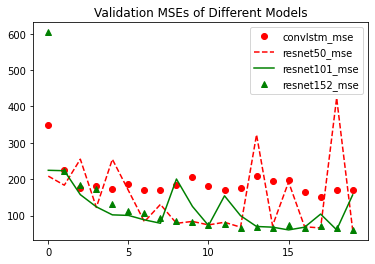

In [ ]:
    f2 = plt.figure(2)
    epochs = range(0,20)
    #plt.axis((0,nb_epochs,0,1.2))
    plt.xticks(np.arange(0,21,5))
    plt.plot(epochs, convlstm_mse, 'ro', label='convlstm_mse')
    plt.plot(epochs, resnet50_mse, 'r--', label='resnet50_mse')
    plt.plot(epochs, resnet101_mse, 'g-', label='resnet101_mse')
    plt.plot(epochs, resnet152_mse, 'g^', label='resnet152_mse')
    plt.title('Validation MSEs of Different Models')
    plt.legend()
    #plt.draw()
    plt.pause(0.001)
    plt.show()

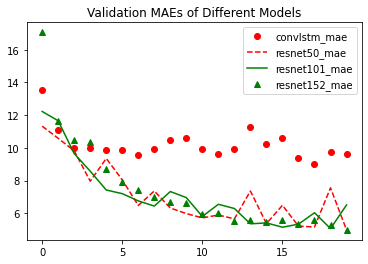

In [ ]:
    f1 = plt.figure(1)
    epochs = range(0,20)
    #plt.axis((0,nb_epochs,0,1.2))
    plt.xticks(np.arange(0,20,5))
    plt.plot(epochs, convlstm_mae, 'ro', label='convlstm_mae')
    plt.plot(epochs, resnet50_mae, 'r--', label='resnet50_mae')
    plt.plot(epochs, resnet101_mae, 'g-', label='resnet101_mae')
    plt.plot(epochs, resnet152_mae, 'g^', label='resnet152_mae')
    plt.title('Validation MAEs of Different Models')
    plt.legend()
    #plt.draw()
    plt.pause(0.001)
    plt.show()

In [ ]:
y = np.load('/content/drive/My Drive/Project/train_label.npy')

In [ ]:
y_train = []
for i in range(len(y)):
  for j in range(15):
    y_train.append(y[i])

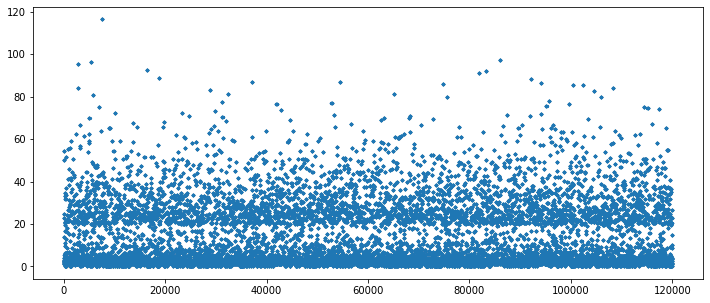

In [ ]:
f3 = plt.figure(figsize=(12,5))
x = range(0,120000,1)
plt.scatter(x,y_train,s=5)
plt.show()

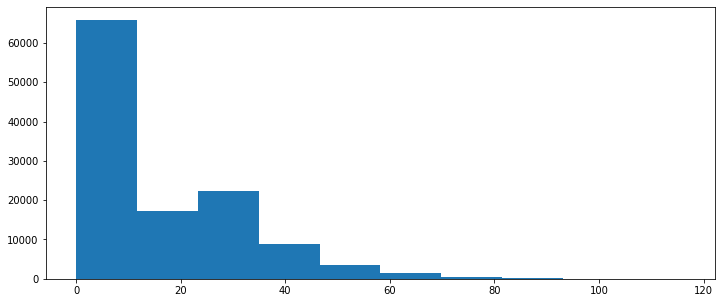

In [ ]:
f4 = plt.figure(figsize=(12,5))
plt.hist(y_train)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras import metrics,applications

from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [ ]:
model = load_model('/content/drive/My Drive/Project/model_best_ResNet50_2.h5')

In [ ]:
X_test = np.load('/content/drive/My Drive/Project/test_img_forCNN.npy')
y_t = np.load('/content/drive/My Drive/Project/test_label_forCNN.npy')
#X_test = X_test[:,:,3,:]
y_test = []
for i in range(len(y_t)):
  for j in range(15):
    y_test.append(y_t[i])
del y_t
y_test = np.array(y_test)
X_test =X_test.reshape(30000,101,101,1)

In [ ]:
y_predict = model.predict(X_test)


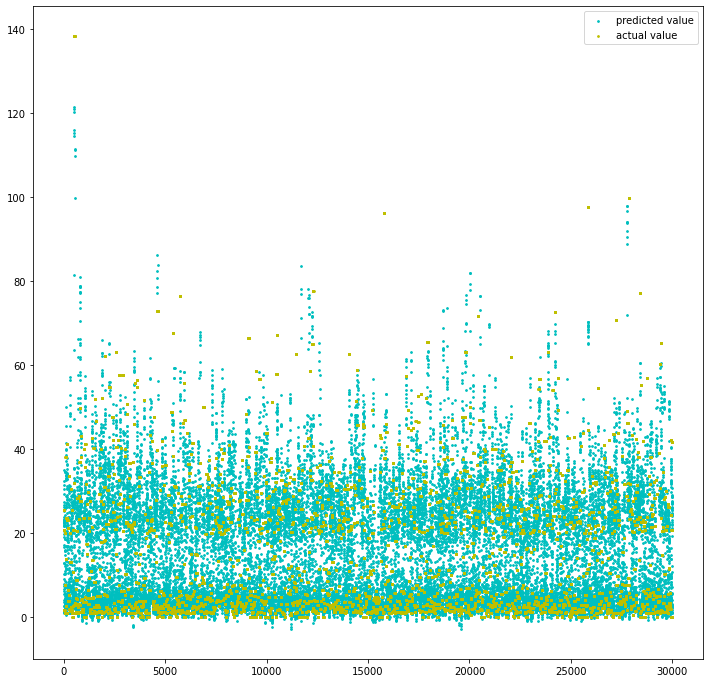

In [ ]:
f5 = plt.figure(figsize=(12,12))
x = range(0,30000,1)
plt.scatter(x,y_predict,s=3,c='c',label='predicted value')
plt.scatter(x,y_test,s=3,c='y',label='actual value')
plt.legend()
plt.show()

In [ ]:
len(y_test)

30000

In [ ]:
y_predict_part = model.predict(X_test[150:165])

In [ ]:
y_predict_part

array([[ 2.7573307],
       [ 3.4702685],
       [ 3.843573 ],
       [ 6.3638678],
       [16.819183 ],
       [19.05875  ],
       [ 3.3633847],
       [12.356445 ],
       [ 5.27489  ],
       [ 4.7717876],
       [ 5.330034 ],
       [ 3.9934497],
       [ 3.6657324],
       [ 2.5086024],
       [ 1.2256403]], dtype=float32)

In [ ]:
y_test[150:165]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

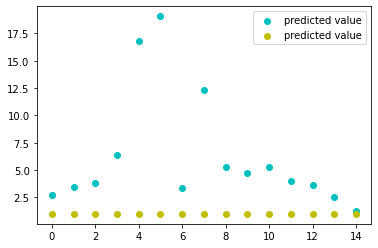

In [ ]:
f6 =plt.figure()
plt.scatter(range(len(y_predict_part)),y_predict_part,c='c',label='predicted value')
plt.scatter(range(15),y_test[150:165],c='y',label='predicted value')
plt.legend()
plt.show()

In [ ]:
from PIL import Image

In [ ]:
a = []
for i in range(15):
    a.append(Image.fromarray(X_test[150+i].reshape(101,101)))

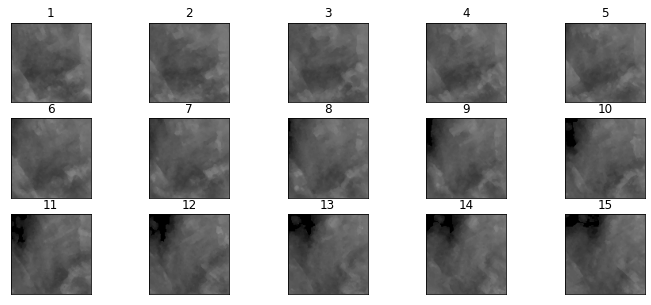

In [ ]:
f8= plt.figure(figsize=(12,5))


for i in range(15):

  plt.subplot(3,5,i+1)
  plt.imshow(a[i])
  plt.title(i+1)
  plt.xticks([])
  plt.yticks([])

plt.show()

In [ ]:
a=0
b=0
c=0
d=0
for i in range(len(y_predict)):
  if abs(y_predict[i]-y_test[i])/y_test[i]<0.2:
    a=a+1
  elif abs(y_predict[i]-y_test[i])/y_test[i]<0.5:
    b=b+1
  elif abs(y_predict[i]-y_test[i])/y_test[i]<1:
    c=c+1
  else:
    d=d+1


print(a)
print(b)
print(c)
print(d)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


7966
8302
6627
7105


In [ ]:
h= [None]*4
h[0]=a
h[1]=b
h[2]=c
h[3]=d

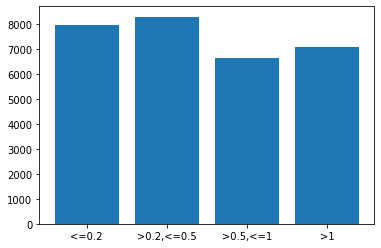

In [ ]:
f9 =plt.figure()
plt.bar(range(4),h,tick_label=['<=0.2','>0.2,<=0.5','>0.5,<=1','>1'])
plt.show()